# Lecture 39 - Final Project Discussion; Dimensionality Reduction with PCA

# CNNs: shared-weight Neural Networks

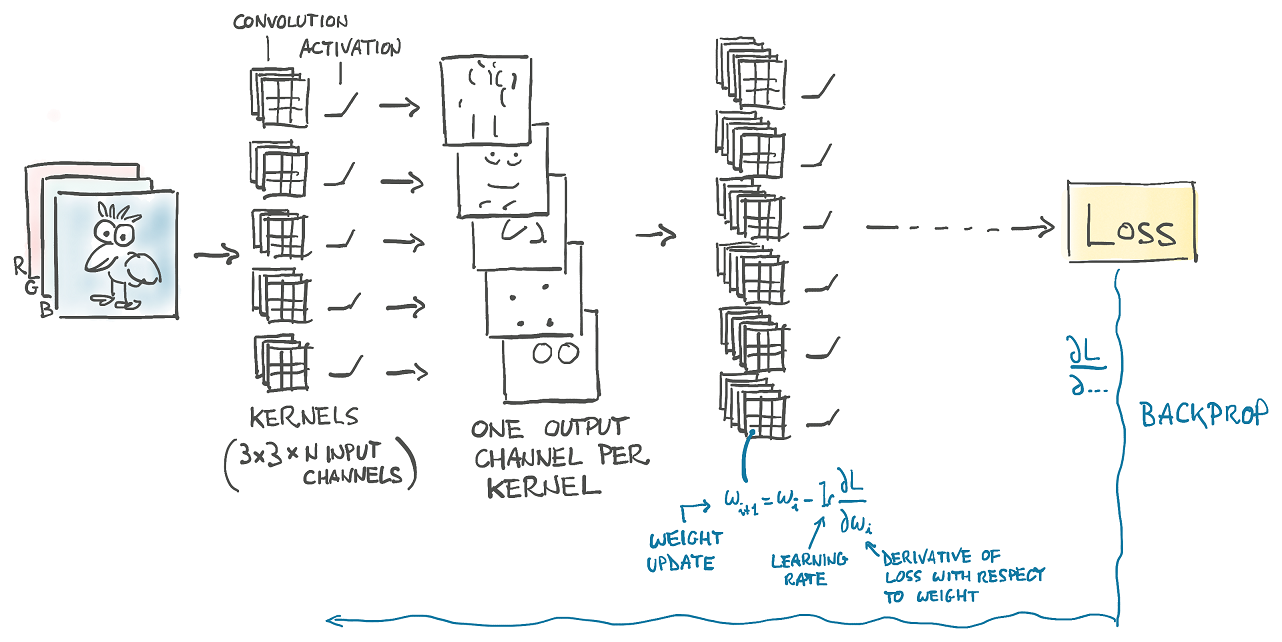

In [1]:
#"Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.
from IPython.display import Image
Image('figures/filters.png', width=700)

### Kernel/Filter Sizes

Small kernels, like $3 \times 3$ or $5 \times 5$ provide very local information. The problem is how do we know that big picture all structures in our images are 3 pixels or 5 pixels wide?

In order to identify larger objects in an image we will need large convolution kernels. Well, sure, at the limit we could get a
$32 \times 32$ kernel for a $32 \times 32$ image, but we would converge to the old fully connected, affine transformation and lose all the nice properties of convolution. 

Another option, which is what is used in convolutional neural networks, is stacking one convolution after the other, and at the same time downsampling the image in-between successive convolutions.

![CNNs](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/593px-Typical_cnn.png)

So, on one hand, the first set of kernels operates on small neighborhoods on first-order, low-level features, while the second set of kernels effectively operates on wider neighborhoods, producing features that are compositions of the previous features. This is a very powerful mechanism that provides convolutional neural networks with the ability to see into very complex scenes

### Pooling Layers & Strides

Downsampling could in principle occur in different ways. Scaling an image by a half is the equivalent of taking 4 neighboring pixels in input and producing one pixel in output. How we compute the value of the output based on the values of the input is up to us. We could:

* **Average-pooling**: average the four pixels. This was a common approach early on, but has since fallen out of favor somewhat.
* **Max-pooling**: take the maximum of the four pixels. This is currently the most commonly used approach, but has a downside of discarding the other 3/4ths of the data.
* **Stride**: perform a strided convolution, where only every Nth pixel is calculated. A 3x4 convolution with stride 2 still incorporates input from all pixels from the previous layer. Current literature shows promise for this approach, but it has not yet supplanted maxpool.

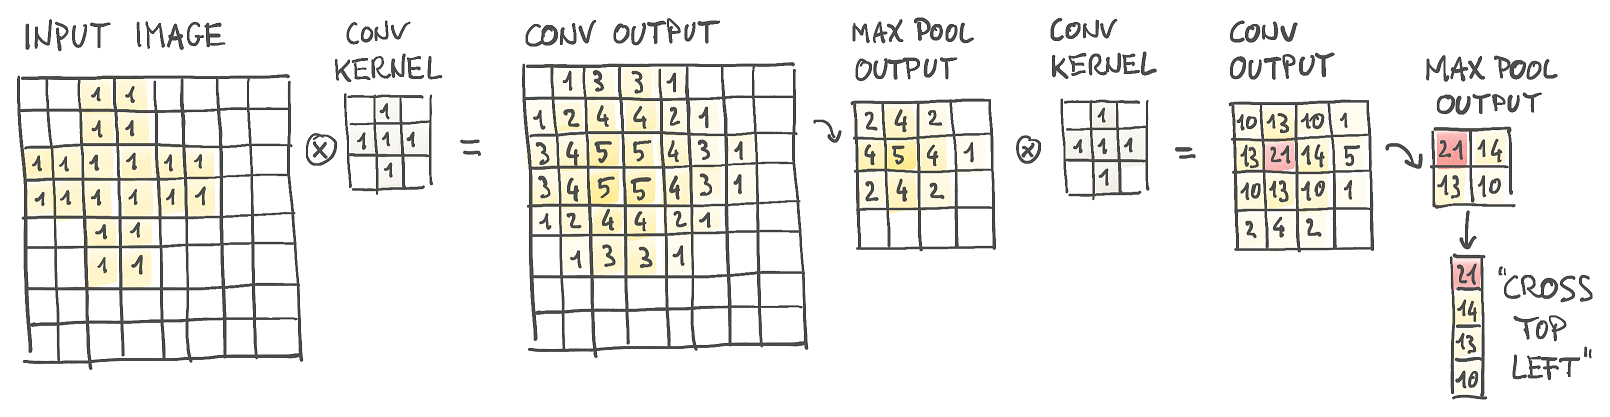

In [2]:
#"Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.
Image('figures/maxpooling.png', width=700)

Intuitively, the output images from a convolution layer, especially since they are followed by an activation just like any other linear layer, will tend to have a high magnitude where certain features corresponding to the estimated kernel are detected (e.g. vertical lines). By keeping the highest value in the 2x2 neighborhood as the downsampled output, we ensure that the features that have been found survive the downsampling, at the expense of the weaker responses.

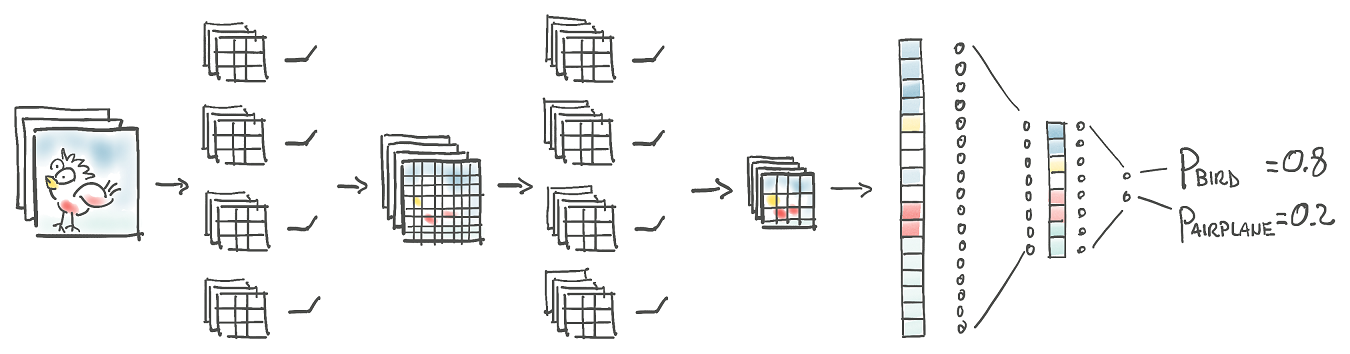

In [3]:
#"Deep Learning with PyTorch" by Eli Stevens and Luca Antiga, Manning Publications, 2020.
Image('figures/CNN.png', width=700)

In deep learning, we let kernels get estimated from data, in a way that the discrimination is most effective. For instance, in terms of non-negative log likelihood of the output compared to ground truth. From this angle, the job of a convolutional neural network is to estimate the kernel of a set of filter banks in successive layers, that will transform a multi-channel image into another multi-channel image, where different channels will correspond to different features (e.g. one channel for the average, another channel for vertical edges, etc).

___

# Transfer Learning

* with Keras: https://keras.io/guides/transfer_learning/
* with Pytorch: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

You can also make use of transfer the knowledge in these pre-trained models using a modality called **transfer learning**.

When we train the network on a large dataset(for example: ImageNet), we train all the parameters of the neural network and therefore the model is learned. It may take hours (or days) on your GPU.

We can give the new dataset to fine tune the pre-trained model. Consider that the new dataset is almost similar to the original dataset used for pre-training. Since the new dataset is similar, the same weights can be used for extracting the features from the new dataset.


* If the new dataset is very small, it's better to train only the final layers of the network to avoid overfitting, keeping all other layers fixed. That is, remove the final layers of the pre-trained network. Add new layers and retrain only the new layers.

* If the new dataset is large, typical route is to retrain the whole network with initial weights from the pre-trained model.

How to fine tune if the new dataset is very different from the original dataset?

* The earlier features of a CNN contain more low-level features (e.g. edge detectors or color blob detectors), but later layers of a CNN becomes progressively more specific to the details of the classes contained in the original dataset.

* The earlier layers can help to extract the features of the new data. 

Once again, if the new dataset is small, it is best to fix the earlier layers and retrain the rest of the layers. If the new training dataset is large, you can retrain the whole network with weights initialized from the pre-trained network.

___

## Tips for the Final Project

**Implementation details:**

* You may use any library you wish, just check with me if you are using a package outside of Anaconda libraries to make sure I have it installed.

* Make your code clean and easy to read. Commenting your code is recommended, specially when you are working with a team.

**Dimensionality Reduction**

* You can also try using different features from dimensionality reduction algorithms studied in class

* Note that PCA can also be used to decorrelate the features. This will be useful as this transformation will make the features the most informative.

**Choice of a Model**

* Don't select just one model. Try at least 2. 

* Change the parameters to find the best model for your data.
    * Report and discuss different architecture and models you have tried, even if you decided not to use them as the final submission.

**Data Augmentation**

* In order to promote generalization, you can do any data augmentation you wish: adding noise, rotating images, etc.

* You can also **add more data** by collecting your own data or scraping the web for more images.

**Extra Credit Competition**

* Identity *unknown* class - you can use the characteristics of the softmax function to help you in determining whether the network is "sure" about any one given class or whether you should classify it as a new class.

___

# Dimensionality Reduction

Some applications of dimensionality reduction include:
1. Combat the **curse of dimensionality**
    * Recall: as the number of features used in the representation increases so does (1) the number of samples required for training, (2) the running time of the algorithm, and (3) the possibility of overfitting.
2. Data visualization

3. Feature extraction

4. Data classification

5. Trend analysis

6. Noise reduction

7. and many more

## Dimensionality Reduction transformations we will cover

We will study different approaches to perform **dimensionality reduction**, in order to decrease the effects of the curse of dimensionality. These include:

1. Principal Component Analysis (PCA)
2. Linear Discriminant Analysis/Fisher's Discriminant (LDA)
3. Multi-Dimensional Scaling (MDS)
4. ISOMAP
5. Locally Linear Embedding (LLE)

Each one of these approaches will consider *pose* the problem of reducing dimensionality differently...

### Manifold Learning

We are interested in using machine learning to make decisions regarding phenomena that cannot be directly observed but may be represented in the observed/input data.

In naturally high-dimensional spaces, we may suffer consequences from the Curse of Dimensionality, so we want our algorithms to operate on underlying latent factors (hidden variables) rather than the raw observed data.

These hidden variables are often described as the **degrees of freedom manifold** that the data lies on.

* we are effectively trying to find this lower-dimensional manifold that characterizes the data variability.

We want machine learning to exploit these hidden relationships in the data when making decisions.

## Feature Selection & Feature Extraction

Note that feature selection and feature extraction are two different approaches.

1. **Feature Selection:** Choosing a subset of the original pool of features.
    
2. **Feature Extraction:** Creating useful features from data.
    * Dimensionality reduction techniques such as PCA are performing feature extraction.

In **feature selection**, we can have three main approaches:

1. **Wrappers:** a wrapper evaluates a specific model sequentially using different potential subsets of features to get the subset that best works in the end. They are highly costly and have a high chance of overfitting, but also a high chance of success, on the other hand.
    * Example: Forward Sequential Feature Selection, Backward Feature Elimination, etc.

2. **Filters:** for a much faster alternative, filters do not test any particular algorithm, but rank the original features according to their relationship with the problem (labels) and just select the top of them. Correlation and mutual information are the most widespread criteria. There are many easy to use tools, like the [feature selection ```scikit-learn``` package](https://scikit-learn.org/stable/modules/feature_selection.html).

    * Example: Correlation, chi-squared test, ANOVA, information gain, etc.

3. **Embedded:** this group is made up of all the Machine Learning techniques that include feature selection during their training stage. 
    * Example: LASSO, Elastic Net, Ridge, etc.

___

# Principal Component Analysis (PCA)

A very common approach (and one of the simplest approaches) to **dimensionality reduction** is **Principal Component Analysis** (or **PCA**). 

* PCA takes data from *sensor coordinates* to *data centric coordinates* using linear transformations.

PCA uses a **linear transformation** to **minimize the redundancy** of the resulting transformed data (by ending up with data that is uncorrelated).
* This means that every transformed dimension is more informative.
* In this approach, the dimensionality of the space is still the same as the original data, but the space of features are now arranged such that they contain the most information.

If we wish to reduce dimensionality of our feature space, we can choose only the features that carry over the most information in the linearly transformed space.
* In other words, PCA will find the underlying **linear manifold** that the data is embedded in.

**PCA finds the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one**. 

There are a couple of points-of-view on how to find $A$: 

1. Maximum Variance Formulation
2. Minimum-error Formulation

To be continued...